<a href="https://colab.research.google.com/github/Marvinh2000/Marv2023/blob/main/Marvin_Hern%C3%A1ndez_Tarea_1_Data_Analytics_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 - Proceso de generación de valor por extración de datos


Este proyecto esta diseñado para que usted pueda:

1.   Poner en práctica los conocimientos específicos del leguaje Python y las bibliotecas de Pandas, Matplotlib con Seaborn y numpy
2.   Generar una plantilla reutilizable de un proceso de limpieza, consolidación y carga de datos
3.   Aplicar los conocimientos analizando una base de datos del mundo real.

Utilizaremos el dataset superstore que puede encontar en la carpeta de datasets de Google Drive. Este es la información de ventas y ordenes de cuatro años de una tienda en línea y le permitirá hacer análisis de ventas, categorías etc.

Mantenga en mente que algunos errores en carga y limpieza de datos pueden surgir. Su tarea es identificarlos y sobreponerse a ellos.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Importar Datos e Identificar variables a limpiar

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: ignored

In [ ]:
path = r'/content/drive/MyDrive/Colab_Notebooks/superstore'
files = os.listdir(path)
files

['superstore_dataset2011-2015-8.csv',
 'superstore_dataset2011-2015-5.csv',
 'superstore_dataset2011-2015-4.csv',
 'superstore_dataset2011-2015-3.csv',
 'superstore_dataset2011-2015-2.csv',
 'superstore_dataset2011-2015-1.csv']

In [ ]:
superstore = pd.DataFrame()
for file in files:
  df_temp = pd.read_csv(path + "/"+ file, encoding='latin-1')
  df_temp['file_name'] = file
  superstore = pd.concat([superstore, df_temp], ignore_index=True)

In [ ]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,file_name
0,7694,MX-2011-157049,13-06-2011,13-06-2011,Same Day,BD-11560,Brendan Dodson,Home Office,Cuajimalpa,Distrito Federal,...,Technology,Copiers,"Canon Fax Machine, High-Speed",631.91364,3,0.002,87.35364,78.28,Critical,superstore_dataset2011-2015-8.csv
1,15772,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,...,Furniture,Bookcases,"Dania Stackable Bookrack, Mobile",437.72400,4,0.100,165.32400,68.34,High,superstore_dataset2011-2015-8.csv
2,10075,US-2011-102288,13-06-2011,17-06-2011,Standard Class,KT-16465,Kean Takahito,Consumer,Presidente Dutra,Maranhão,...,Furniture,Chairs,"Office Star Bag Chairs, Set of Two",215.37600,14,0.600,-231.78400,39.85,High,superstore_dataset2011-2015-8.csv
3,15771,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,...,Furniture,Bookcases,"Sauder Corner Shelving, Metal",264.16800,2,0.100,55.72800,30.14,High,superstore_dataset2011-2015-8.csv
4,27155,IN-2011-51390,13-06-2011,17-06-2011,Standard Class,RB-19705,Roger Barcio,Home Office,Palembang,Sumatera Selatan,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",332.52960,1,0.270,18.21960,30.14,Medium,superstore_dataset2011-2015-8.csv


In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          61550 non-null  int64  
 1   Order ID        61550 non-null  object 
 2   Order Date      61550 non-null  object 
 3   Ship Date       61550 non-null  object 
 4   Ship Mode       61550 non-null  object 
 5   Customer ID     61550 non-null  object 
 6   Customer Name   61550 non-null  object 
 7   Segment         61550 non-null  object 
 8   City            61550 non-null  object 
 9   State           61550 non-null  object 
 10  Country         61550 non-null  object 
 11  Postal Code     11899 non-null  float64
 12  Market          61550 non-null  object 
 13  Region          61550 non-null  object 
 14  Product ID      61550 non-null  object 
 15  Category        61550 non-null  object 
 16  Sub-Category    61550 non-null  object 
 17  Product Name    61550 non-null 

In [ ]:
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,61550.000000,11899.000000,61550.000000,61550.000000,61550.000000,61550.000000,61550.000000
mean,25609.792851,55128.031599,248.323138,3.482924,0.143001,28.714501,26.616875
std,14813.424323,32085.202363,498.100427,2.281280,0.212477,175.320805,58.027798
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12802.250000,22801.000000,30.930000,2.000000,0.000000,0.000000,2.620000
50%,25552.500000,57103.000000,85.320000,3.000000,0.000000,9.180000,7.810000
75%,38468.750000,90008.000000,251.959000,5.000000,0.200000,36.810000,24.637500
max,51290.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# Creación de nueva base de datos en Google Drive

# Limpieza de Datos

In [ ]:
superstore.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,file_name
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
superstore.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       49651
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
file_name             0
dtype: int64

In [ ]:
#LIMPIANDO LA INFORMACION
#ELIMINA NULOS
superstore.dropna(axis=0, how='any', inplace=True)
#ELIMINA DUPLICADOS
superstore.drop_duplicates(inplace=True)
#COMPROBANDO NULOS
superstore.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
file_name         0
dtype: int64

In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11899 entries, 28 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          11899 non-null  int64         
 1   Order ID        11899 non-null  object        
 2   Order Date      11899 non-null  datetime64[ns]
 3   Ship Date       11899 non-null  datetime64[ns]
 4   Ship Mode       11899 non-null  object        
 5   Customer ID     11899 non-null  object        
 6   Customer Name   11899 non-null  object        
 7   Segment         11899 non-null  object        
 8   City            11899 non-null  object        
 9   State           11899 non-null  object        
 10  Country         11899 non-null  object        
 11  Postal Code     11899 non-null  object        
 12  Market          11899 non-null  object        
 13  Region          11899 non-null  object        
 14  Product ID      11899 non-null  object        
 15  C

# Explorando datos

Conectando a la nueva base de datos:

In [ ]:
superstore['Order Date'].head()

28   2011-06-13
37   2012-06-13
52   2012-06-13
68   2012-06-13
69   2012-06-13
Name: Order Date, dtype: datetime64[ns]

In [ ]:
superstore['Ship Date'].head()

28   2011-06-17
37   2012-06-19
52   2012-06-14
68   2012-06-19
69   2012-06-15
Name: Ship Date, dtype: datetime64[ns]

In [ ]:
#CAMBIANDO TIPOS DE DATOS
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], yearfirst=True)
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'], yearfirst=True)
superstore['Postal Code'] = superstore['Postal Code'].astype(str)
superstore['Category'] = superstore['Category'].astype(str)
superstore['Sub-Category'] = superstore['Sub-Category'].astype(str)
superstore['Discount'] = superstore['Discount'].astype(float)
superstore['Shipping Cost'] = superstore['Shipping Cost'].astype(float)

In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11899 entries, 28 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          11899 non-null  int64         
 1   Order ID        11899 non-null  object        
 2   Order Date      11899 non-null  datetime64[ns]
 3   Ship Date       11899 non-null  datetime64[ns]
 4   Ship Mode       11899 non-null  object        
 5   Customer ID     11899 non-null  object        
 6   Customer Name   11899 non-null  object        
 7   Segment         11899 non-null  object        
 8   City            11899 non-null  object        
 9   State           11899 non-null  object        
 10  Country         11899 non-null  object        
 11  Postal Code     11899 non-null  object        
 12  Market          11899 non-null  object        
 13  Region          11899 non-null  object        
 14  Product ID      11899 non-null  object        
 15  C

# Analizando Categorías, tendencias, medias y creando valor

Deberá crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.



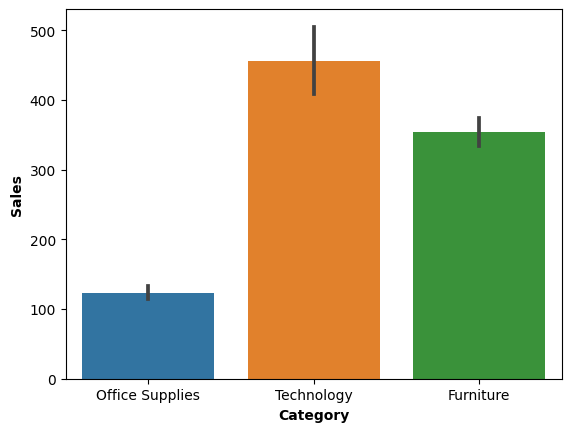

In [ ]:
#Comparar dos variables con al menos una segmentación por categoría
sns.barplot(x='Category', y='Sales', estimator='mean', width=0.8, data=superstore)
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Sales', fontweight='bold')
plt.show()

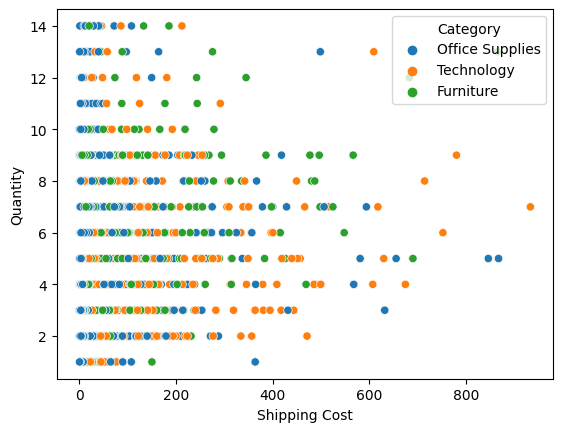

In [ ]:
#Analizar gráficamente multiples variables numéricas
sns.scatterplot(x=superstore['Shipping Cost'], y=superstore['Quantity'] , hue=superstore['Category']  )
plt.show()

Plot charts, Gráficos de tendencia y Barra con su análisis de que significa:

<ipython-input-83-add90120290d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = superstore.corr()


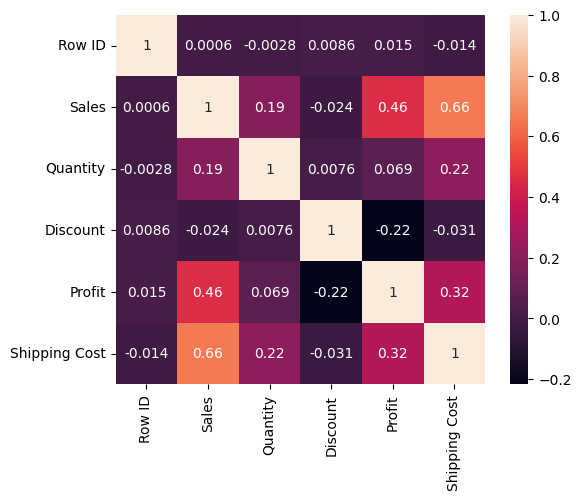

In [ ]:
corrmat = superstore.corr()
sns.heatmap(corrmat, vmax=1, annot=True, square=True);

# Conclusiones

Plot charts, Gráficos de tendencia y Barra con su análisis de que significa:

<Axes: xlabel='Year', ylabel='Quantity'>

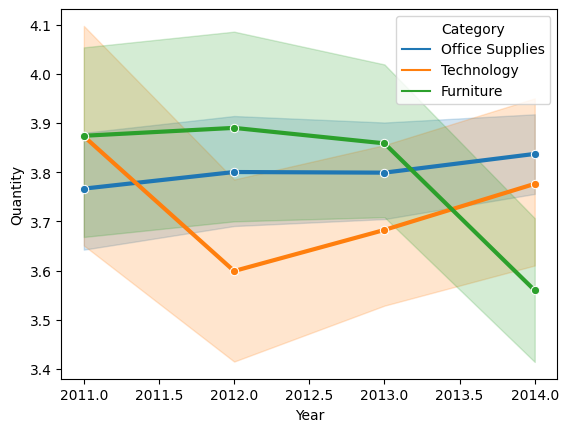

In [ ]:
superstore['Year'] = superstore['Order Date'].dt.year
superstore['Year'] = superstore['Year'].astype(int)
sns.lineplot(x='Year',
             y='Quantity',
             data=superstore,
             marker = "o",
             linewidth = 3,
             hue = 'Category')

La tendencia de venta en cuanto a unidades del año 2012 ha incrementado por parte de la categoría de Technología, mientras que el ascenso se ve reflejado anualmente en la categoría de Office Supplies; mientras que la tendencia de disminución en en la proyección de ventas de unidades se da para Furniture desde el año 2012.
